In [4]:
from abtem import __version__
print('current version:', __version__)

from ase import build
import matplotlib.pyplot as plt
import numpy as np
import os

from dask_cuda import LocalCUDACluster
from dask.distributed import Client

from abtem import FrozenPhonons, Probe, Potential

os.environ["MKL_NUM_THREADS"] = "1"

current version: 1.0.0beta22


In [2]:
cluster = LocalCUDACluster(memory_limit='9gb', n_workers=1)
client = Client(cluster)

C:\Users\jacob\anaconda3\envs\abtem-dask-gpu\lib\site-packages\dask_cuda\utils.py:168: UserWarning: Cannot get CPU affinity for device with index 0, setting default affinity
  warnings.warn(


In [5]:
client = Client()

In [6]:
client

Client Scheduler: tcp://127.0.0.1:51560 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 31.93 GiB


In [7]:
silicon = build.bulk('Si', crystalstructure='diamond', cubic=True)
silicon *= (74,74,2)

In [15]:
fp = FrozenPhonons(silicon, 4, {'Si':.1}, directions='xyz')

potential = Potential(fp, 
                      gpts=2048,
                      device='cpu',
                      projection='infinite', 
                      slice_thickness=.5,
                      precalculate=False)

wave = Probe(energy=100e3, semiangle_cutoff=9.4, device='cpu', rolloff=0)
wave.grid.match(potential)

In [16]:
measurment = wave.multislice((0,0), potential).compute()

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

In [64]:
%%time
a = measurement.compute()

Wall time: 8.71 s


(-25.0, 25.0)

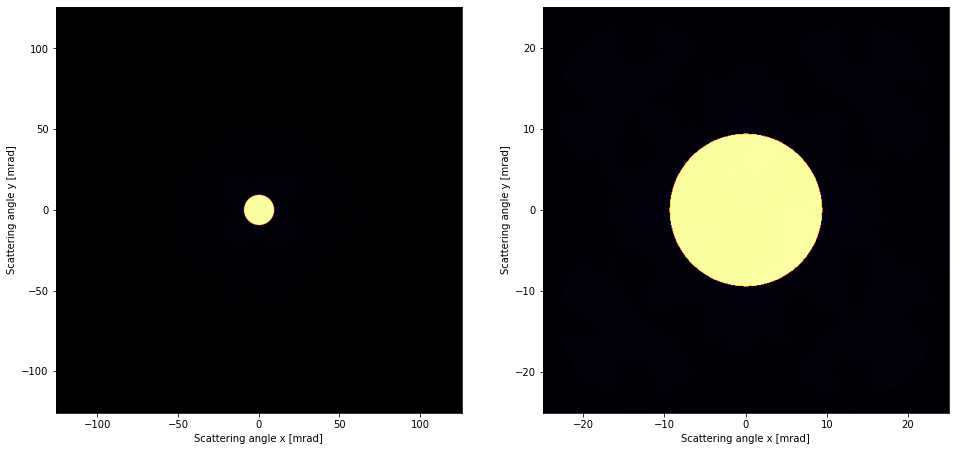

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
measurement.show(ax=ax1, power=.5, cmap='inferno')
measurement.show(ax=ax2, power=.5, cmap='inferno')

ax2.set_xlim([-25,25])
ax2.set_ylim([-25,25])